In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
data = pd.read_csv ('movies_simkl.csv')
data.head()

,Unnamed: 0,title,release_date,country,genres,imdb_rate,simkl_rate,runtime,watched,release_year
0,0,Avatar: The Way of Water,2022-12-06,us,"Action, Adventure, Science Fiction, War",7.6,7.76,192.0,7664,2022
1,1,Avatar 3,2025-12-19,us,"Action, Adventure, Science Fiction",NaN,9.00,NaN,24,2025
2,2,Pirates of the Caribbean: On Stranger Tides,2011-05-07,us,"Action, Adventure, Fantasy",6.6,6.71,137.0,50961,2011
3,3,Avengers: Age of Ultron,2015-04-22,us,"Action, Adventure, Science Fiction",7.3,7.30,141.0,75555,2015
4,4,Avengers: Endgame,2019-04-22,us,"Action, Adventure, Science Fiction",8.4,8.28,181.0,60211,2019


In [9]:
data = data.drop('Unnamed: 0', axis=1)

In [33]:
# Find top 10 movies with highest IMDb ratings

top_10_imdb = data.sort_values('imdb_rate', ascending=False).head(10)
print (top_10_imdb [['title','imdb_rate', 'simkl_rate']])

                                  title  imdb_rate  simkl_rate
20                The Dark Knight Rises        8.4        8.00
4                     Avengers: Endgame        8.4        8.28
8                Avengers: Infinity War        8.4        8.31
43                         The Avengers        8.0        7.89
38                               Avatar        7.9        7.66
34           X-Men: Days of Future Past        7.9        7.61
32       Guardians of the Galaxy Vol. 3        7.9        8.19
36         Star Wars: The Force Awakens        7.8        7.44
27           Captain America: Civil War        7.8        7.67
23  The Hobbit: The Desolation of Smaug        7.8        7.61


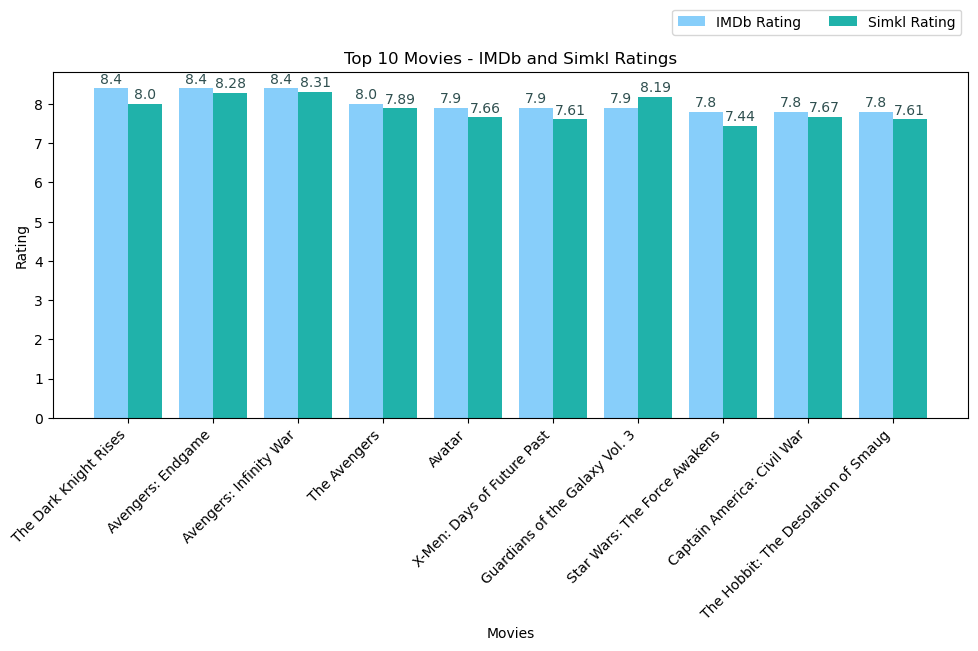

In [60]:
# Create grouped bar chart of ratings top 10 movies

x_indexes = np.arange(len(top_10_imdb['title']))

plt.figure(figsize=(10, 7))

plt.bar(x_indexes, top_10_imdb['imdb_rate'], width=bar_width, color='lightskyblue', label='IMDb Rating')
plt.bar(x_indexes + bar_width, top_10_imdb['simkl_rate'], width=bar_width, color='lightseagreen', label='Simkl Rating')

for i, rate in enumerate(top_10_imdb['imdb_rate']):
    plt.text(i, rate + 0.05, str(rate), ha='center', va='bottom', color='darkslategrey')

for i, rate in enumerate(top_10_imdb['simkl_rate']):
    plt.text(i + bar_width, rate + 0.05, str(rate), ha='center', va='bottom', color='darkslategrey')


plt.xlabel('Movies')
plt.ylabel('Rating')
plt.title('Top 10 Movies - IMDb and Simkl Ratings')
plt.xticks(ticks=x_indexes + bar_width / 2, labels=top_10_imdb['title'], rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.2), ncols=2)

plt.tight_layout()
plt.show()

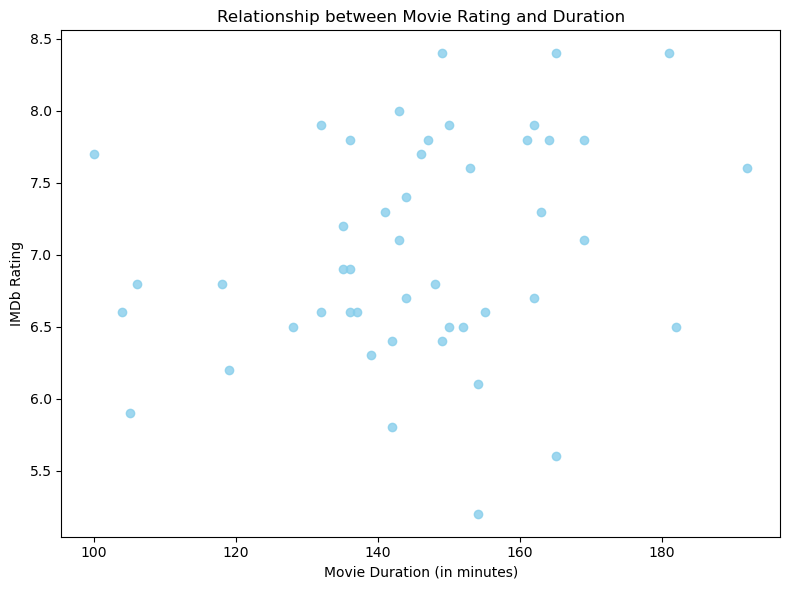

In [66]:
# Creating a scatter plot to find out relationship between rating and Duration

filtered_data = data.dropna(subset=['imdb_rate', 'runtime'])

plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['runtime'], filtered_data['imdb_rate'], color='skyblue', alpha=0.8)

plt.title('Relationship between Movie Rating and Duration')
plt.xlabel('Movie Duration (in minutes)')
plt.ylabel('IMDb Rating')

plt.tight_layout()
plt.show()

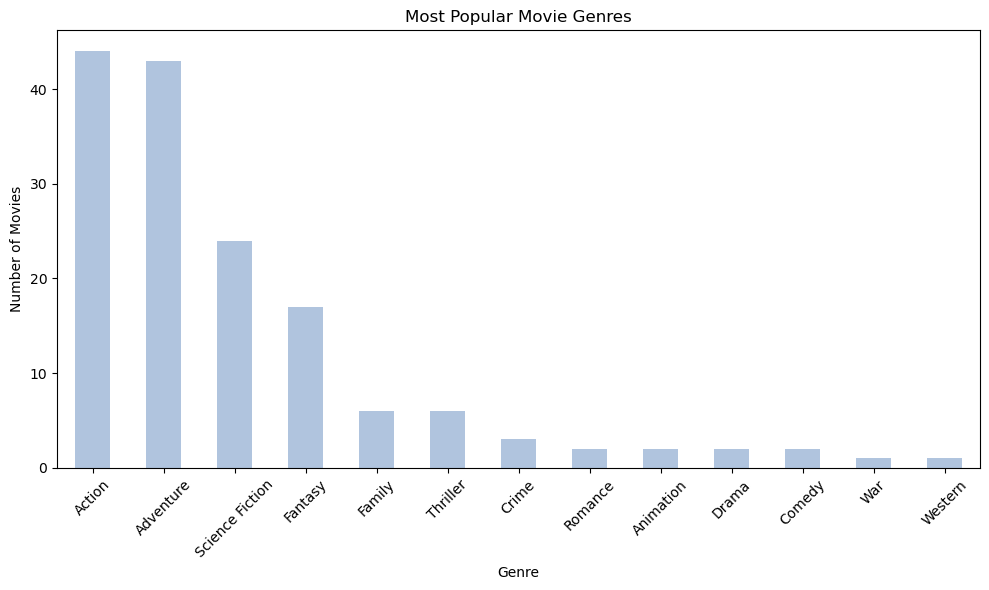

In [70]:
# Create bar plot 
# Splitting genres into separate rows
genres_split = data['genres'].str.split(', ').explode()

genre_counts = genres_split.value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='lightsteelblue')

plt.title('Most Popular Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
# Finding most watched films released in 2022

movies_2022 = data[data['release_year'] == 2022]
top_3_watched_2022 = movies_2022.sort_values('watched', ascending=False).head(3)

print(top_3_watched_2022[['title', 'watched']])

                             title  watched
0         Avatar: The Way of Water     7664
33          Thor: Love and Thunder     6058
31  Black Panther: Wakanda Forever     4544


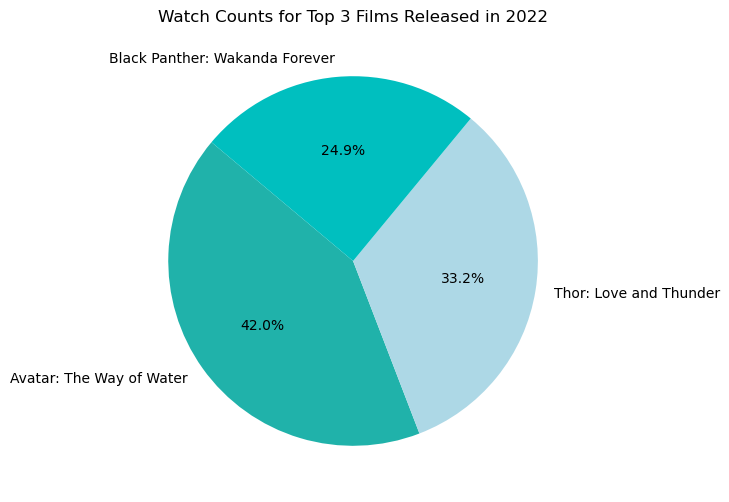

In [79]:
# Creating pie chart

labels = top_3_watched_2022['title']
sizes = top_3_watched_2022['watched']
colors = ['lightseagreen', 'lightblue', 'c']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Watch Counts for Top 3 Films Released in 2022')

plt.show()